In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df  = pd.read_csv('../dataset/Linear_regression(petrol_consumption).csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
#Getting to know your data

In [4]:
df.shape

(48, 5)

In [5]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Petrol_tax                      48 non-null float64
Average_income                  48 non-null int64
Paved_Highways                  48 non-null int64
Population_Driver_licence(%)    48 non-null float64
Petrol_Consumption              48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [7]:
#Checking for missing values
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [8]:
#Univariate Analysis
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


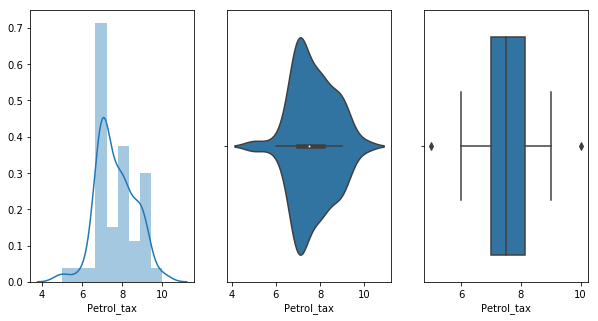

In [20]:
plt.subplots(figsize=(10,5))
plt.subplot(131)
sns.distplot(df['Petrol_tax'])
plt.subplot(132)
sns.violinplot(df['Petrol_tax'])
plt.subplot(133)
sns.boxplot(df['Petrol_tax'])

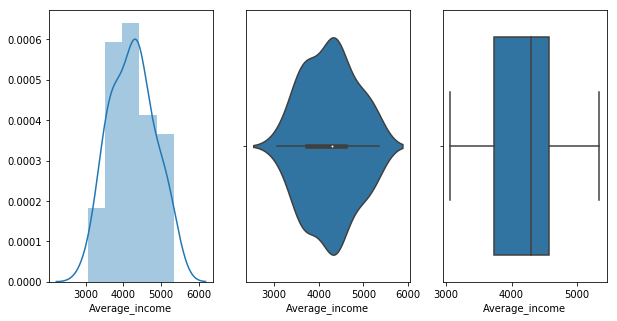

In [22]:
plt.subplots(figsize=(10,5))
plt.subplot(131)
sns.distplot(df['Average_income'])
plt.subplot(132)
sns.violinplot(df['Average_income'])
plt.subplot(133)
sns.boxplot(df['Average_income'])

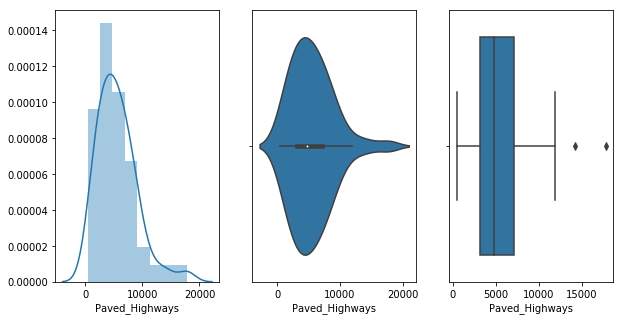

In [23]:
plt.subplots(figsize=(10,5))
plt.subplot(131)
sns.distplot(df['Paved_Highways'])
plt.subplot(132)
sns.violinplot(df['Paved_Highways'])
plt.subplot(133)
sns.boxplot(df['Paved_Highways'])

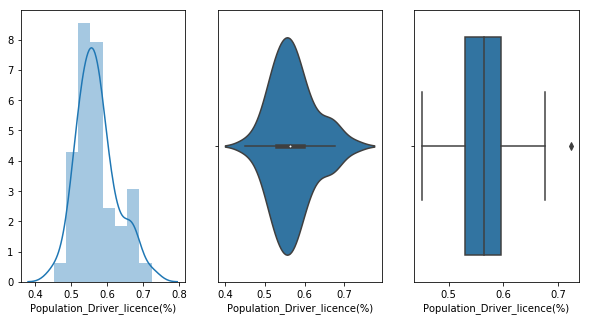

In [24]:
plt.subplots(figsize=(10,5))
plt.subplot(131)
sns.distplot(df['Population_Driver_licence(%)'])
plt.subplot(132)
sns.violinplot(df['Population_Driver_licence(%)'])
plt.subplot(133)
sns.boxplot(df['Population_Driver_licence(%)'])

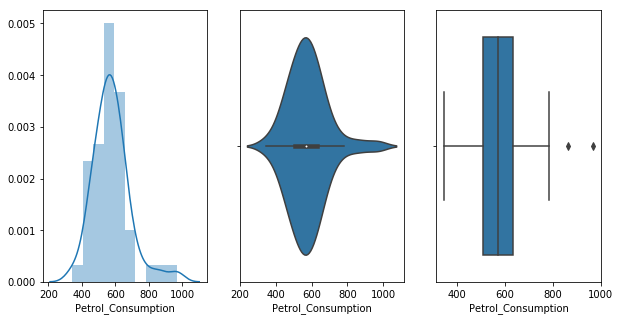

In [25]:
plt.subplots(figsize=(10,5))
plt.subplot(131)
sns.distplot(df['Petrol_Consumption'])
plt.subplot(132)
sns.violinplot(df['Petrol_Consumption'])
plt.subplot(133)
sns.boxplot(df['Petrol_Consumption'])

In [50]:
#Bivariate Analysis

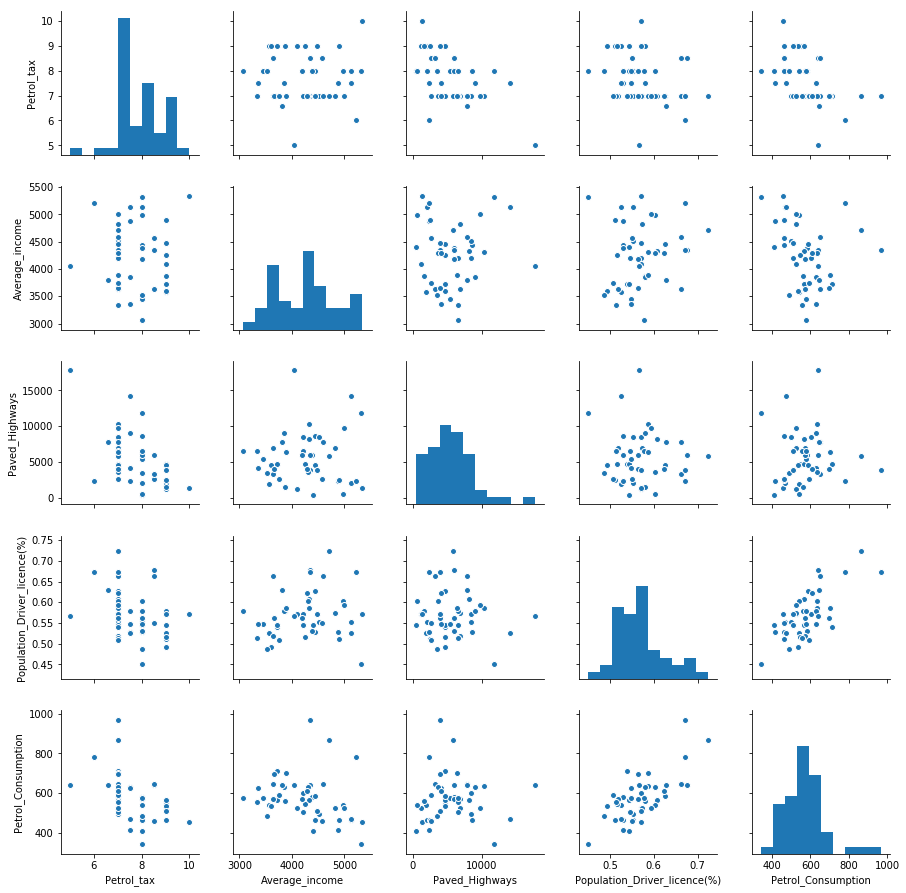

In [26]:
sns.pairplot(df)

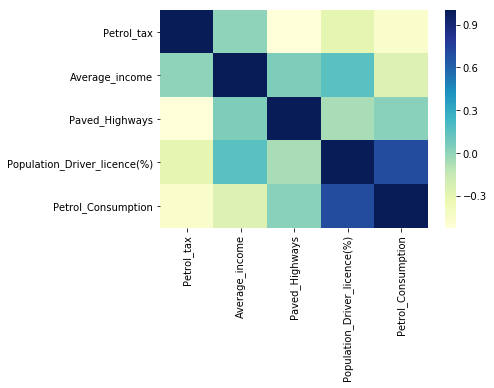

In [30]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [31]:
#Preparing dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

In [32]:
train_x = train.loc[:, train.columns != "Petrol_Consumption"]
test_x = test.loc[:, test.columns != "Petrol_Consumption"]
train_y = train["Petrol_Consumption"]
test_y = test["Petrol_Consumption"]

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
test_pred = model.predict(test_x)

In [35]:
result = pd.DataFrame({'Actual': test_y, 'Predicted': test_pred})
print(result)

    Actual   Predicted
19     640  693.684454
21     540  569.110050
36     640  636.375422
27     631  608.245750
18     865  782.530303
29     534  462.679065
35     644  712.595395
11     471  440.654707
43     591  538.217426
17     714  582.433012


In [36]:
#Computing Mean Squared Error 
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(test_y, test_pred))
print(mean_absolute_error(test_y, test_pred))

4187.02731633
54.625421334


In [37]:
#Computing r2 Score
from sklearn.metrics import r2_score
print(r2_score(test_y, test_pred)*100)

60.7610882581
